# FINAL GRADE PREDICTOR

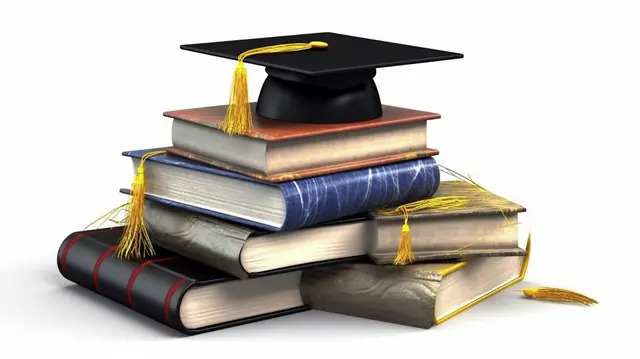

# Introduction to Artificial Intelligence Summative


# Final Summative Group Project


In [10]:
# from google.colab import drive
# drive.mount('/content/drive')



**Importing necessary libraries**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation,Dropout
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [13]:
pip install keras-tuner


In [14]:
import keras_tuner as kt

1.  school - student's school (binary: 'GP' - Gabriel Pereira or 'MS'Mousinho  a Silveira)
2.  sex - student's sex (binary: 'F' - female or 'M' - male)
3.  age - student's age (numeric: from 15 to 22)
4.  address - student's home address type (binary: 'U' - urban or 'R' - rural)
5.  famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6.  Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8.  Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9.  Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10.  Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11.  reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12.  guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13.  traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14.  studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15.  failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16.  schoolsup - extra educational support (binary: yes or no)
17.  famsup - family educational support (binary: yes or no)
18.  paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19.  activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21.  higher - wants to take higher education (binary: yes or no)
22.  internet - Internet access at home (binary: yes or no)
23.  romantic - with a romantic relationship (binary: yes or no)
24.  famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25.  freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26.  goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27.  Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28.  Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29.  health - current health status (numeric: from 1 - very bad to 5 - very good)
30.  absences - number of school absences (numeric: from 0 to 93)
31.  G1 - first period grade (numeric: from 0 to 20)
32.  G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

# DATA ANALYSIS

**Loading the datasets containing students' academic performance**

In [15]:
Data=pd.read_csv("/content/student-mat1.csv")
Data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [16]:
data2=pd.read_csv("/content/student-por1.csv", na_values='-')
data2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11.0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11.0,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13.0,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14.0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11.0,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15.0,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12.0,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10.0,10


**Merging the two datasets into one combined dataframe(Data ,Data2)**

In [17]:
combined_df = pd.concat([Data, data2])
combined_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6.0,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5.0,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8.0,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14.0,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11.0,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15.0,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12.0,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10.0,10


**# Checking the structure and summary of the combined data**


In [18]:
combined_df.columns # Display column names

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [19]:
combined_df.info()   # Summary of the dataframe including data types and missing values

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1044 non-null   int64  
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null   objec

In [20]:
combined_df.isnull().sum()   # Count of missing values in each column

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            1
G3            0
dtype: int64

In [21]:
combined_df.shape       # Shape of the dataframe (number of rows and columns)


(1044, 33)

**Descriptive Analysis**

In [22]:
combined_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1043.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.215517,11.245446,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983256,3.286564,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Data Preprocessing

**Removing duplicate rows from the dataframe**

In [23]:
combined_df = combined_df.drop_duplicates()

**Separating columns into numerical and categorical for easier processing**

In [24]:
numerical_columns =combined_df.select_dtypes(include=['number']).columns
numerical_columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

Exploring the emotional fators that influence the student performance .

In [25]:
categorical_columns = combined_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

# Exploratory Data Analysis

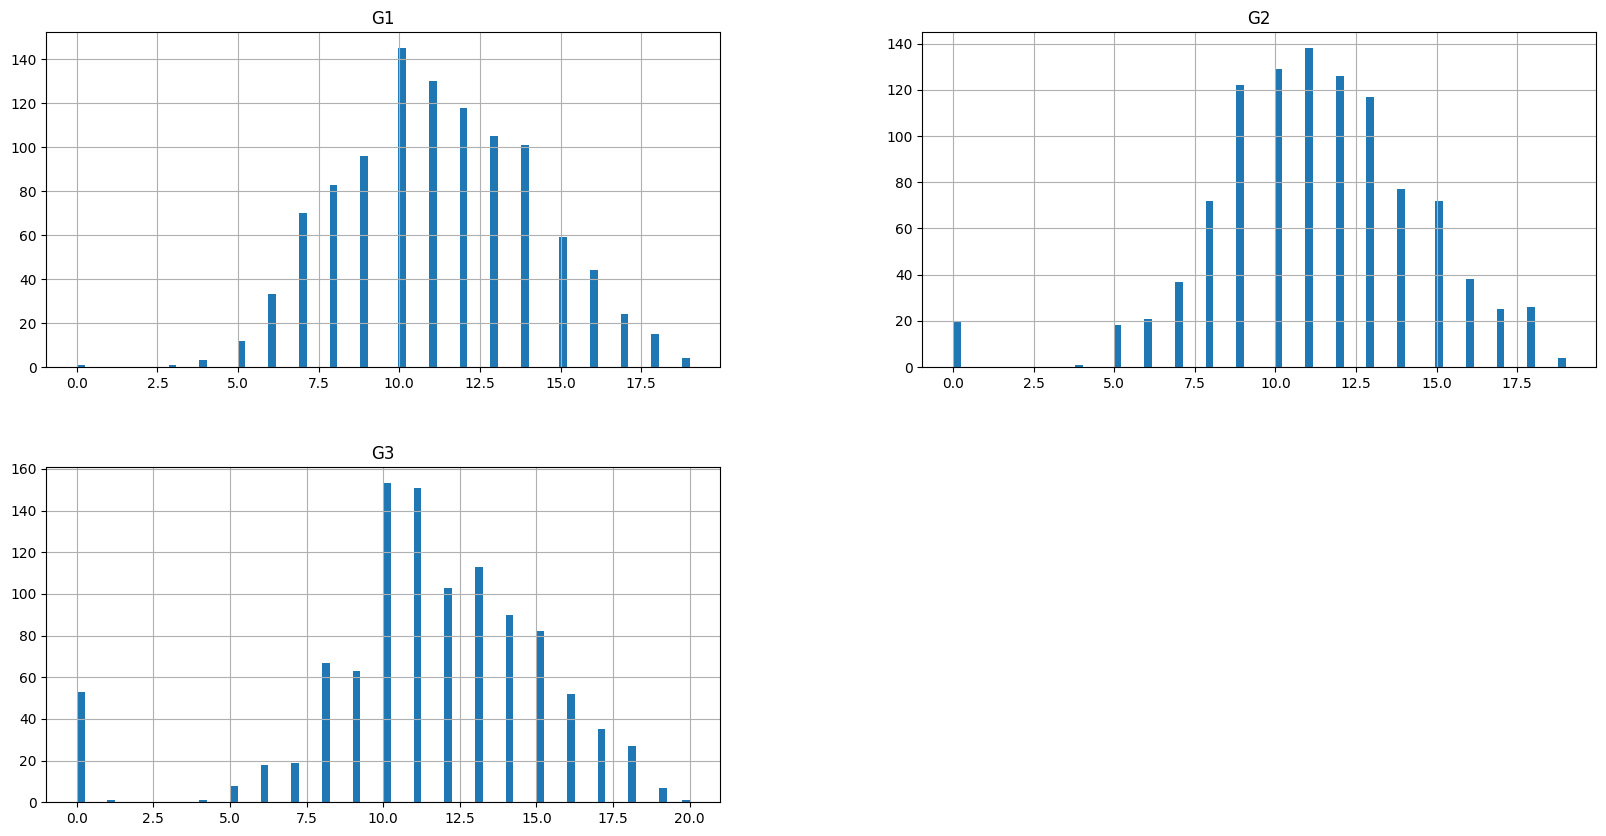

In [26]:
combined_df[['G1','G2','G3']].hist(bins=80, figsize=(20,10))    # Visualizing the distribution of grades (G1, G2, G3)
plt.show()

* First period grade  has it distribution as fairly
sysmmetrical indicating that most students scored around average with fewer student having extremely low or high grades.The majority of students had from 10-12 .


* Second Period Grade has the histogram is slightly skewed to the left compared to G1, indicating a slight increase in grades for some students from the first to the second period.The majority of students had from 10-12 .


* Final Grade, This histogram also shows a normal distribution, indicating that final grades are in line with the earlier grades proving it dependrnce on G1 and G2.


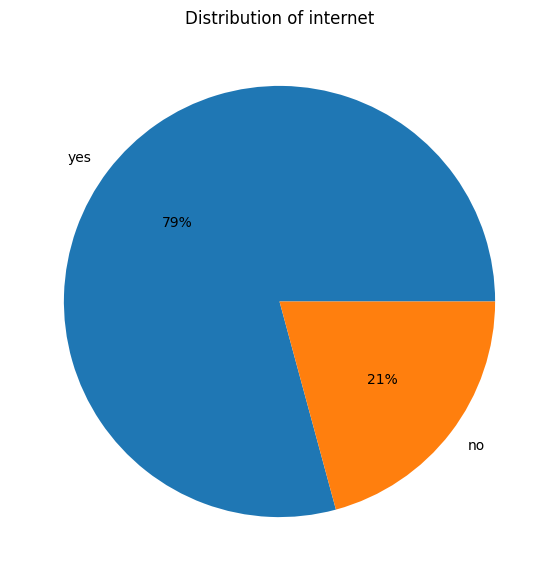

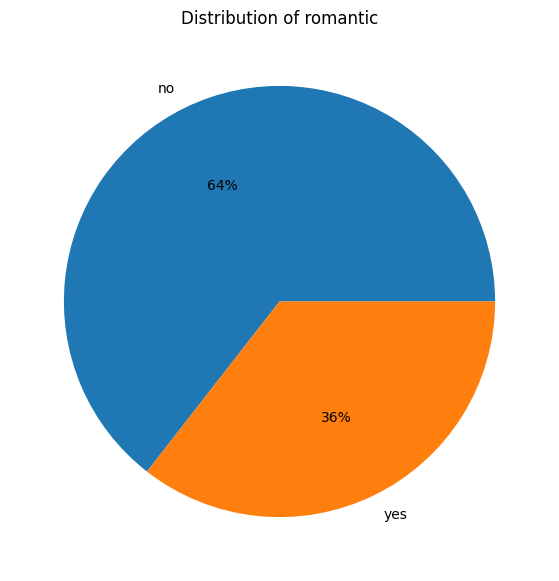

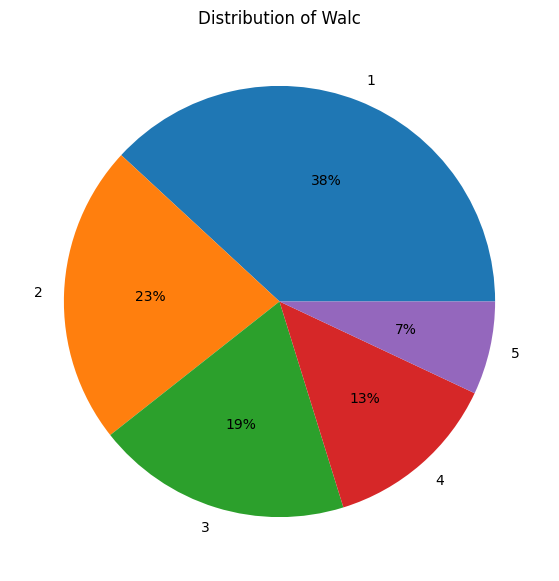

In [27]:
# Creating pie charts for selected categorical columns to understand their distribution
# List of selected categorical columns
selected_categorical_columns = [ 'internet', 'romantic','Walc']

# Iterate over each selected categorical column
for i in selected_categorical_columns:
    value_counts = combined_df[i].value_counts()

    # Create labels and sizes for the pie chart
    labels = value_counts.index
    sizes = value_counts.values

    # Create the pie chart
    fig = plt.figure(figsize=(10, 7))
    plt.pie(sizes, labels=labels, autopct='%.0f%%')
    plt.title(f"Distribution of {i}")
    plt.show()

* From the student dataset ,64% are not in a realationship and 36% are in a  relationship

* Weekend alcohol consumption :The largest portion is category 1, suggesting that the most common level of weekend alcohol consumption is the lowest.

* Internet :79% of the students have internet access and 21%  don't have access to internet



**Finding the relationship between the age and relationship status**

Text(0, 0.5, 'Count')

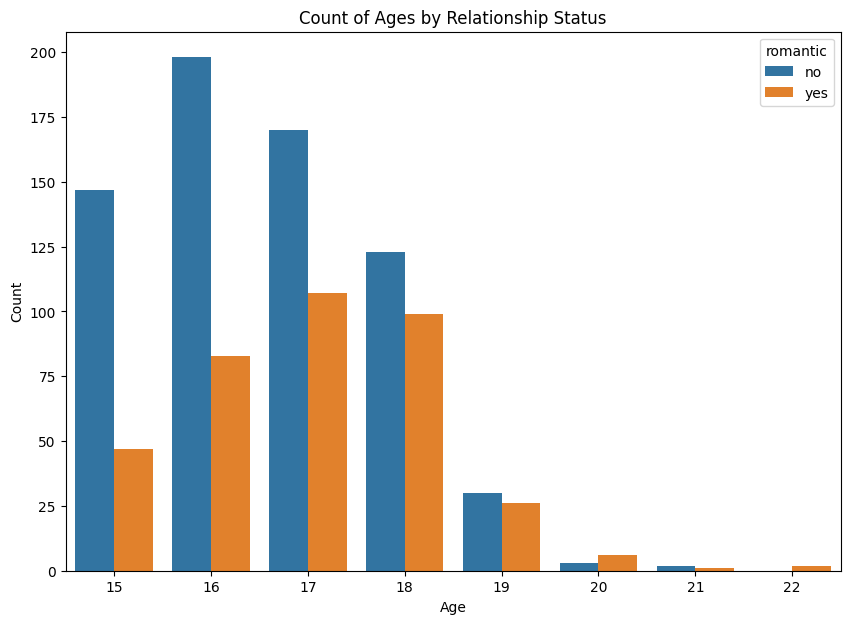

In [28]:
# Analyzing relationship status by age
plt.figure(figsize=(10, 7))
sns.countplot(x='age', hue='romantic', data=combined_df)

# Add a title and labels
plt.title('Count of Ages by Relationship Status')
plt.xlabel('Age')
plt.ylabel('Count')

* The number of individuals not in a relationship (blue bars) increases sharply from age 15 to 16, then gradually decreases.

* The highest counts for both categories are in the 16-18 age range.
For all ages, there are more individuals not in a romantic relationship than those who are.


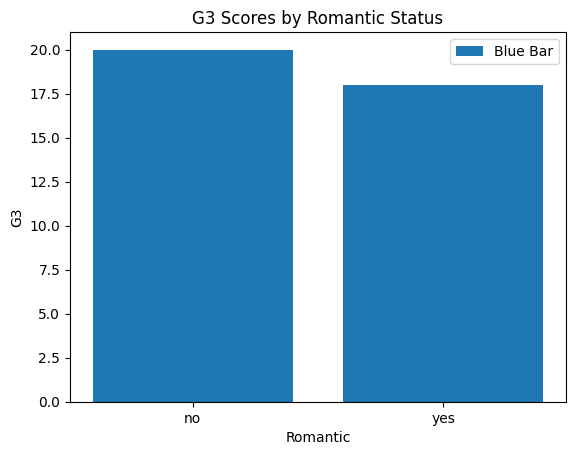

In [29]:
# Visualizing the relationship between romantic status and final grade (G3)
x1 = combined_df['romantic']
y1 = combined_df['G3']

plt.bar(x1, y1, label="Blue Bar" )

plt.xlabel('Romantic')
plt.ylabel('G3')
plt.title('G3 Scores by Romantic Status')
plt.legend()
plt.show()


This bar chart compares students' final grades (G3 scores) based on their romantic status.

* One bar for students not in a romantic relationship ("no") and the other for
students in a romantic relationship ("yes")
* The graph indicates that students who are not in romantic relationships have slightly higher average final grades (around 20) compared to those who are in relationships (around 17.5-18).
* This suggests a small negative correlation between being in a romantic relationship and academic performance, though other factors may be involved and causation cannot be inferred from this data alone.

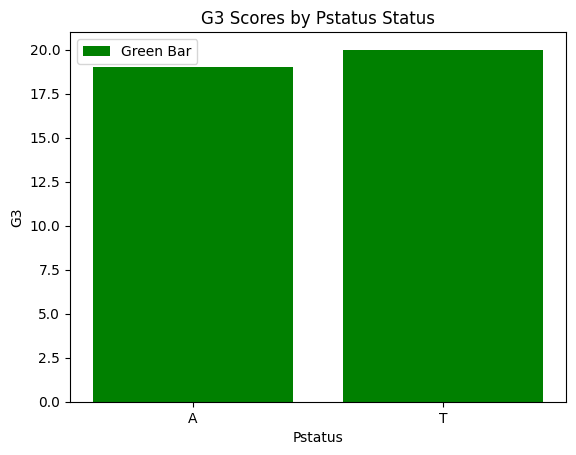

In [30]:
# Visualizing the relationship between parent status (living together or apart) and final grade (G3)
x1 = combined_df['Pstatus']
y1 = combined_df['G3']
plt.bar(x1, y1, label="Green Bar", color='green')
plt.xlabel('Pstatus')
plt.ylabel('G3')
plt.title('G3 Scores by Pstatus Status')
plt.legend()
plt.show()

This bar chart compares students' final grades (G3 scores) based on their parents' living status (Pstatus):

"A" likely represents parents living apart and
"T" likely represents parents living together

* The graph shows two green bars of nearly equal height, with the "T" bar slightly higher.
* This suggests that students whose parents live together have marginally higher average final grades compared to those whose parents live apart.
* However, the difference appears minimal, indicating that parental living status may not have a substantial impact on students' academic performance in this dataset.

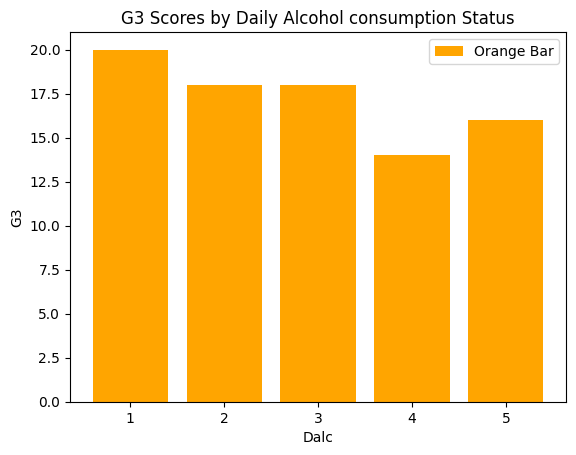

In [31]:
# Visualizing the relationship between daily alcohol consumption and final grade (G3)
x1 = combined_df['Dalc']
y1 = combined_df['G3']
plt.bar(x1, y1, label="Orange Bar", color='orange')
plt.xlabel('Dalc')
plt.ylabel('G3')
plt.title('G3 Scores by Daily Alcohol consumption Status')
plt.legend()
plt.show()

This bar chart shows the relationship between students' daily alcohol consumption (Dalc) and their final grades (G3). The data is represented by orange bars for five levels of alcohol consumption, from 1 (lowest) to 5 (highest).
Key findings:

* Students with the lowest alcohol consumption (level 1) have the highest average grades.
* There's a general downward trend in grades as alcohol consumption increases.
* The lowest grades correspond to level 4 consumption.
* There's a slight increase in grades for the highest consumption level (5) compared to level 4.

Overall, the chart suggests a negative correlation between daily alcohol consumption and academic performance, with higher consumption generally associated with lower grades.

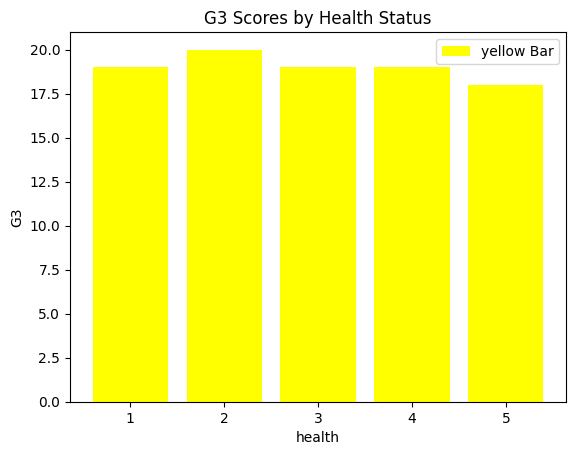

In [32]:
# Visualizing the relationship between health status and final grade (G3)
x1 = combined_df['health']
y1 = combined_df['G3']
plt.bar(x1, y1, label="yellow Bar", color='yellow')
plt.xlabel('health')
plt.ylabel('G3')
plt.title('G3 Scores by Health Status')
plt.legend()
plt.show()

This bar chart illustrates the relationship between students' health status and their final grades (G3 scores):

The x-axis shows health status levels from 1 to 5, likely representing a range from very good health (1) to poor health (5).

Key observations:

* Students with health status 2 have the highest average grades.
There's a general downward trend in grades as health status worsens (moving from 2 to 5).
* The lowest average grades correspond to the poorest health status (5).
Health status 1 shows slightly lower grades than status 2, but still higher than 3-5.

* This suggests a correlation between better health status and higher academic performance, with the exception of the very best health status.

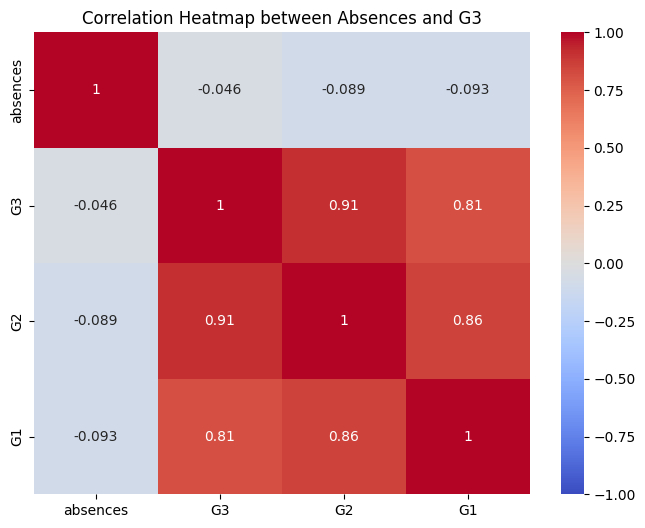

In [33]:
# Visualizing the relationship between parent status (living together or apart) and final grade (G3)
# Extract relevant columns
data_subset = combined_df[['absences', 'G3','G2','G1']]

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Absences and G3')
plt.show()

* This suggest that absences have a weak negative correlation with grades, meaning more absences slightly correlate with lower grades.
* These values suggest that the grades are strongly positively correlated with each other, meaning that if a student performs well in one grade, they are likely to perform well in the others too.

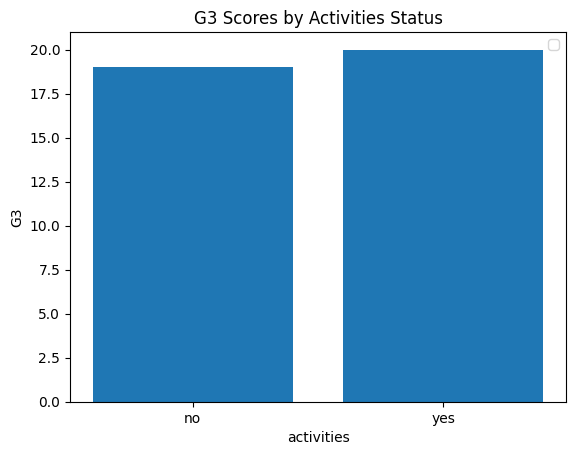

In [34]:
# Visualizing the relationship between activities and final grade (G3)
x1 = combined_df['activities']
y1 = combined_df['G3']
plt.bar(x1, y1)

plt.xlabel('activities')
plt.ylabel('G3')
plt.title('G3 Scores by Activities Status')
plt.legend()
plt.show()

* The heights of the bars are nearly identical, indicating that there is no significant difference in the final grades between these two groups. This suggests that participation in activities does not have a substantial impact on students' final grades in this dataset.








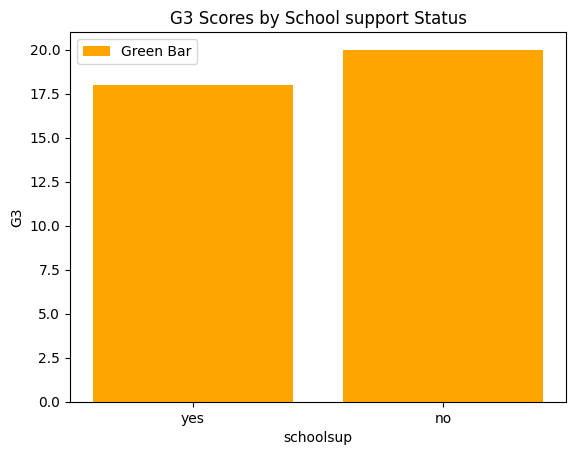

In [35]:
# Visualizing the relationship between school support and final grade (G3)
x1 = combined_df['schoolsup']
y1 = combined_df['G3']
plt.bar(x1, y1, label="Green Bar", color='orange')
plt.xlabel('schoolsup')
plt.ylabel('G3')
plt.title('G3 Scores by School support Status')
plt.legend()
plt.show()

* The chart shows that students who did not receive school support tend to have slightly higher final grades than those who did receive support. This suggests that in this dataset, receiving school support does not correlate with higher final grades.


**Dropping G1 and G2 since they have a high impact in what the result of G3 will be. We want our model to discover what other features have a high impact in determining that a student will either pass or fail.**

In [36]:
# Dropping G1 and G2 columns as they are no longer needed for the final analysis
combined_df.drop(['G1','G2'],axis =1 ,inplace = True)
categorical_columns = categorical_columns.drop(['school']) # Remove axis argument here

# Label Encoding
Transforming categorical variables into numerical representations

In [37]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_columns:
    encoder = LabelEncoder()
    combined_df[col] = encoder.fit_transform(combined_df[col])

# Featuring Engineering

Using Correlation to select the most correlating features with G3.

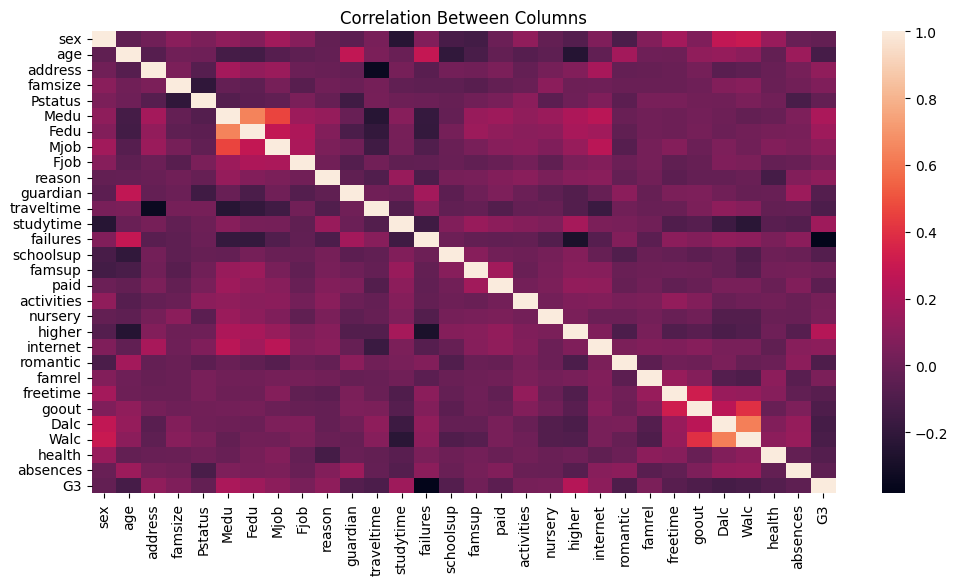

In [38]:
# Calculate correlation matrix, including only numerical columns
corr_matrix = combined_df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr_matrix,
           xticklabels=corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values,
            ax = ax,
           ).set_title("Correlation Between Columns")

plt.show()

In [39]:
correlations = combined_df.select_dtypes(include=['number']).corr()['G3'].abs().sort_values(ascending=False)
print(correlations)

G3            1.000000
failures      0.383145
higher        0.236578
Medu          0.201472
studytime     0.161629
Fedu          0.159796
Dalc          0.129642
age           0.125282
address       0.117696
Walc          0.115740
reason        0.108671
internet      0.107064
Mjob          0.105640
traveltime    0.102627
romantic      0.098363
goout         0.097877
health        0.080079
schoolsup     0.079346
guardian      0.077320
freetime      0.064890
famsize       0.061209
famrel        0.054461
paid          0.049388
absences      0.045671
Fjob          0.040541
nursery       0.039950
activities    0.033998
sex           0.031472
Pstatus       0.030693
famsup        0.013313
Name: G3, dtype: float64


In [40]:
threshold = 0.1 # Selecting features with correlation greater than a threshold (0.1 in this case)
selected_features = correlations[correlations > threshold].index.tolist()
selected_features
combined_df = combined_df[selected_features]


In [41]:
selected_features

['G3',
 'failures',
 'higher',
 'Medu',
 'studytime',
 'Fedu',
 'Dalc',
 'age',
 'address',
 'Walc',
 'reason',
 'internet',
 'Mjob',
 'traveltime']

**Defining Dependent and Independent Variables**



In [42]:
# Dropping 'G3' to get the features
features = combined_df.drop(columns=['G3']).columns
# Selecting the features and target variable
X = combined_df[features]
Y = combined_df['G3']

In [43]:

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# Model Training


Models used :

* Random Forest Regressor



* XGBRegressor

* Gradient Boosting Regressor

* Artificial Neural Network

In [44]:
# Training and predicting with Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

In [45]:
# Training and predicting with Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [46]:
from xgboost import XGBRegressor
# Training and predicting with XGBRegressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

In [47]:
# Training and predicting with Artificial Neural Network
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the input layer
input_layer = Input(shape=(X_train.shape[1],))

# Add the first hidden layer
x = Dense(units=64, activation='relu')(input_layer)
x = Dropout(0.5)(x)

# Add the second hidden layer
x = Dense(units=64, activation='relu')(x)
x = Dropout(0.5)(x)

# Add the output layer
output_layer = Dense(units=1, activation='linear')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Print model summary
model.summary()

# Training the neural network
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Making predictions with the neural network
nn_predictions = model.predict(X_test)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 97.9788 - mean_squared_error: 97.9788 - val_loss: 16.9504 - val_mean_squared_error: 16.9504
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.9511 - mean_squared_error: 46.9511 - val_loss: 18.2290 - val_mean_squared_error: 18.2290
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35.7343 - mean_squared_error: 35.7343 - val_loss: 19.3877 - val_mean_squared_error: 19.3877
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.1216 - mean_squared_error: 32.1216 - val_loss: 18.4041 - val_mean_squared_error: 18.4041
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.1254 - mean_squared_error: 28.1254 - val_loss: 20.0539 - val_mean_squared_error: 20.0539
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.5811 - mean_squared_error: 29.5811 - val_loss: 19.1431 - val_mean_squared_error: 19.1431
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.8698 - mean_squared_error: 27.8698 - v

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Random Forest Evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

# XGBoost Evaluation
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Gradient Boosting Regressor Evaluation
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

# Neural Network Evaluation
# Evaluate using the model's built-in evaluate method
loss, nn_mse = model.evaluate(X_test, y_test)

# Predict to get other metrics
nn_predictions = model.predict(X_test)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_rmse = np.sqrt(nn_mse)
nn_r2 = r2_score(y_test, nn_predictions)

# Print results
print(f"RandomForestRegressor - RMSE: {rf_rmse}, MAE: {rf_mae}, R²: {rf_r2}")
print(f"XGBoostRegressor - RMSE: {xgb_rmse}, MAE: {xgb_mae}, R²: {xgb_r2}")
print(f"Gradient Boosting Regressor - MSE: {gb_mse}, RMSE: {gb_rmse}, MAE: {gb_mae}, R²: {gb_r2}")
print(f"Neural Network - MSE: {nn_mse}, MAE: {nn_mae}, RMSE: {nn_rmse}, R²: {nn_r2}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.5601 - mean_squared_error: 19.5601 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RandomForestRegressor - RMSE: 3.8359625345416433, MAE: 2.756566985645933, R²: 0.048264563260752236
XGBoostRegressor - RMSE: 4.1880573934280685, MAE: 3.00865606036768, R²: -0.13446937273361992
Gradient Boosting Regressor - MSE: 14.552543167193678, RMSE: 3.814779569935028, MAE: 2.8123209205083506, R²: 0.058746893307430104
Neural Network - MSE: 18.706811904907227, MAE: 3.5060236807645224, RMSE: 4.325137212263586, R²: -0.20994965317638892


# Perform GridSearchCV for each model

In [49]:
# import pandas as pd
# import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle as pkl


# Define models and their parameter grids
models = [
    (RandomForestRegressor(random_state=42),
     {
         'n_estimators': [10, 100],
         'max_depth': [10, 20],
         'min_samples_split': [20, 50]
     }),

    (XGBRegressor(random_state=42),
     {
         'n_estimators': [20, 50],
         'max_depth': [20, 50],
         'learning_rate': [0.01, 0.001]
     }),

    (GradientBoostingRegressor(random_state=42),
     {
         'n_estimators': [20, 50],
         'max_depth': [20, 50],
         'learning_rate': [0.01, 0.001]
     })
]

# Perform GridSearchCV for each model
results = []
for model, param_grid in models:
    print(f"Running GridSearchCV for {model.__class__.__name__}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    results.append({
        'model_name': model.__class__.__name__,
        'best_params': grid_search.best_params_,
        'best_rmse': np.sqrt(-grid_search.best_score_),
        'best_mae': mean_absolute_error(y_train, best_model.predict(X_train)),
        'best_model': best_model
    })

# Print the best parameters, RMSE, and MAE for each model
for result in results:
    print(f"\n{result['model_name']} - Best parameters found:", result['best_params'])
    print(f"{result['model_name']} - Best RMSE score found:", result['best_rmse'])
    print(f"{result['model_name']} - Best MAE score found:", result['best_mae'])

# Evaluate the best models on the test set and save them
for result in results:
    best_model = result['best_model']
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{result['model_name']} - RMSE on test set:", rmse)
    print(f"{result['model_name']} - MAE on test set:", mae)
    print(f"{result['model_name']} - R2 on test set:", r2)
    # Save the best model
    #pkl.dump(best_model, open(result['model_name'] + '.pkl', 'wb'))
    # Print the best parameters and score


Running GridSearchCV for RandomForestRegressor...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Running GridSearchCV for XGBRegressor...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Running GridSearchCV for GradientBoostingRegressor...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

RandomForestRegressor - Best parameters found: {'max_depth': 20, 'min_samples_split': 50, 'n_estimators': 100}
RandomForestRegressor - Best RMSE score found: 3.410629138481329
RandomForestRegressor - Best MAE score found: 2.250336717464601

XGBRegressor - Best parameters found: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}
XGBRegressor - Best RMSE score found: 3.6484876090448197
XGBRegressor - Best MAE score found: 2.072644520948033

GradientBoostingRegressor - Best parameters found: {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 50}
GradientBoostingRegressor - Best RMSE score found: 3.7116680920560823
GradientBoostingRegressor - Best MAE sc

# Fine tuning neural network

In [50]:
!pip install keras-tuner

**Build a sequential neural network model with hyperparameter tuning.**

In [51]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.Sequential()

    # Use Input layer to specify input shape
    model.add(Input(shape=(X_train.shape[1],)))

    # Add the first hidden layer
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.3, max_value=0.6, step=0.1)))

    # Add the second hidden layer
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.3, max_value=0.6, step=0.1)))

    # Add the output layer
    model.add(Dense(units=1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='mean_squared_error',
        metrics=['mean_squared_error']
    )

    return model


In [52]:
tuner = kt.Hyperband(
    build_model,
    objective='val_mean_squared_error',
    max_epochs=20,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)


In [53]:
# Define early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Perform the search
tuner.search(X_train, y_train,
             epochs=20,
             batch_size=32,
             validation_split=0.2,
             callbacks=[early_stopping])


Trial 60 Complete [00h 00m 07s]
val_mean_squared_error: 16.30805206298828

Best val_mean_squared_error So Far: 11.881054878234863
Total elapsed time: 00h 05m 08s


# Evaluation and Optimisation

In [54]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                  # Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test data
loss, mse = best_model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, best_model.predict(X_test))

# Print the results
print(f'Test Mean Squared Error (MSE): {mse}')
print(f'Test Root Mean Squared Error (RMSE): {rmse}')
print(f'Test R²: {r2}')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.5512 - mean_squared_error: 14.5512  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Test Mean Squared Error (MSE): 14.554235458374023
Test Root Mean Squared Error (RMSE): 3.815001370690976
Test R²: 0.05863748201756391


In [55]:
for result in results:
    best_model = result['best_model']
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{result['model_name']} - RMSE on test set:", rmse)
    print(f"{result['model_name']} - MAE on test set:", mae)
    print(f"{result['model_name']} - R2 on test set:", r2)



RandomForestRegressor - RMSE on test set: 3.7527589777756036
RandomForestRegressor - MAE on test set: 2.7282136475037375
RandomForestRegressor - R2 on test set: 0.08910383921442344

XGBRegressor - RMSE on test set: 3.6350958872180277
XGBRegressor - MAE on test set: 2.724858434576737
XGBRegressor - R2 on test set: 0.14532840795950308

GradientBoostingRegressor - RMSE on test set: 3.707425062359379
GradientBoostingRegressor - MAE on test set: 2.8109635536994872
GradientBoostingRegressor - R2 on test set: 0.11097844816376645


# Shap for feature importance

In [56]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00


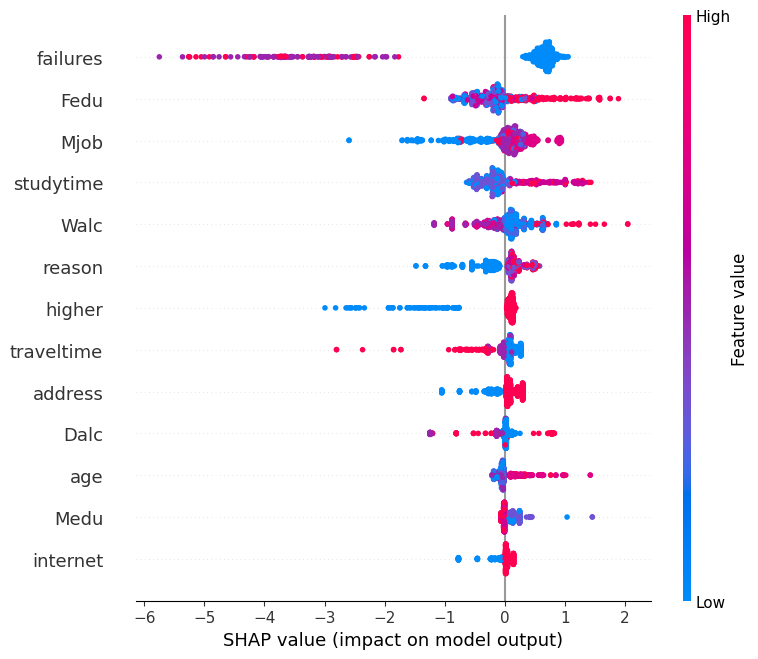

In [57]:
import shap

# For RandomForestRegressor, assuming it's the first in the results list
best_rf_model = results[0]['best_model']


# Extract the list of underlying RandomForestRegressor models from the MultiOutputRegressor
underlying_rf_models = best_rf_model.estimators_

# Create the SHAP explainer for each RandomForestRegressor model and get SHAP values
shap_values_rf = []
for i, model in enumerate(underlying_rf_models):
    explainer = shap.TreeExplainer(model)
    shap_values_rf.append(explainer.shap_values(X_train))

# Example: Visualize the SHAP values for the first output
shap.summary_plot(shap_values_rf[0], X_train)

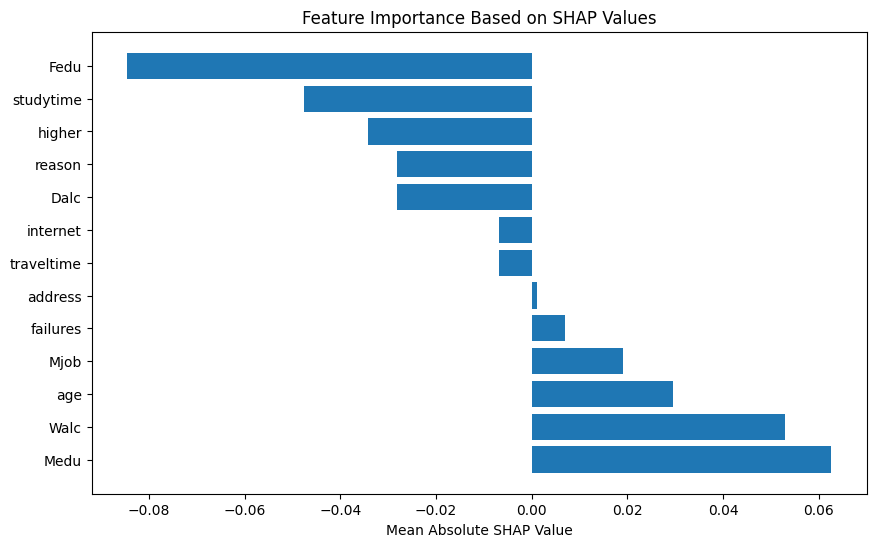

In [58]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the mean absolute SHAP value for each feature
feature_importance = np.mean((shap_values_rf[0]), axis=0) # Use rf_shap_values instead of shap_values

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance Based on SHAP Values')
plt.show()

**Most Importnace features from Shap**

In [59]:
features = ["studytime","reason","higher","traveltime","Fedu","Dalc","age","failures","Mjob","Medu","internet","Walc"]

In [60]:
X = combined_df[features]
Y = combined_df[['G3']]

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [62]:
best_rf_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=20, min_samples_split=50, random_state=42)

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"RandomForestRegressor - MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R²: {r2}")


RandomForestRegressor - MSE: 14.035474345177361, MAE: 2.734746020034352, RMSE: 3.74639484640599, R²: 0.09219071336727314


In [64]:
values = X.iloc[80].values  # Extract values from the second row of x_value
prediction = best_rf_model.predict([values])
print(prediction)

[11.36019396]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [65]:
#Saving the model parameters in a pickle file
import pickle


In [66]:
best_rf_model

RandomForestRegressor(max_depth=20, min_samples_split=50, random_state=42)

In [67]:
filename = 'Model_trained.sav'

In [68]:
pickle.dump(best_rf_model,open(filename,'wb'))

In [69]:
#loading the saved model
loaded_model = pickle.load(open(filename,'rb'))

In [70]:
loaded_model

RandomForestRegressor(max_depth=20, min_samples_split=50, random_state=42)

In [71]:
print(type(loaded_model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
